# classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the data

In [3]:
fire=pd.read_csv('forestfires.csv')
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [76]:
columns=['dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep']
fire.drop(columns=columns,axis=1,inplace=True)

In [77]:
fire.shape

(509, 12)

In [78]:
fire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [79]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    int8   
 1   day            509 non-null    int8   
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    int8   
dtypes: float64(8), int64(1), int8(3)
memory usage: 37.4 KB


In [80]:
fire['month']=pd.Categorical(fire['month'])
fire['month']=fire['month'].cat.codes

In [81]:
fire['day']=pd.Categorical(fire['day'])
fire['day']=fire['day'].cat.codes

In [82]:
fire['size_category']=pd.Categorical(fire['size_category'])
fire['size_category']=fire['size_category'].cat.codes

In [83]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,-0.202791,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,-0.202791,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,-0.202791,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,-0.202791,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,-0.202791,1
...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,-0.102277,0
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0.644559,0
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,-0.028608,0
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,-0.202791,1


In [84]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    int8   
 1   day            509 non-null    int8   
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    int8   
dtypes: float64(8), int64(1), int8(3)
memory usage: 37.4 KB


In [85]:
fire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

<Axes: >

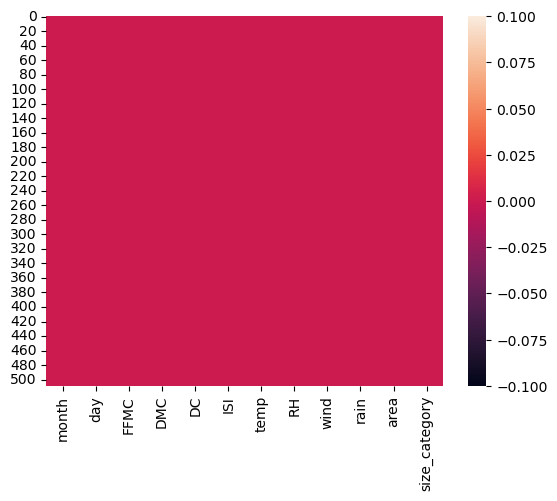

In [86]:
sns.heatmap(fire.isnull())

In [87]:
fire.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
month,1.000000,-0.149053,-0.003122,-0.161662,0.231234,-0.172492,-0.069237,-0.097232,-0.140640,-0.072934,0.028569,-0.024288
day,-0.149053,1.000000,0.073244,0.068438,0.053815,0.113982,0.151230,-0.109650,-0.035736,0.047466,0.019449,-0.005360
FFMC,-0.003122,0.073244,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,-0.024292
DMC,-0.161662,0.068438,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.046598
DC,0.231234,0.053815,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.028372
ISI,-0.172492,0.113982,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.007867
temp,-0.069237,0.151230,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.009976
RH,-0.097232,-0.109650,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.039730
wind,-0.140640,-0.035736,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,-0.059513
rain,-0.072934,0.047466,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.053463


<Axes: >

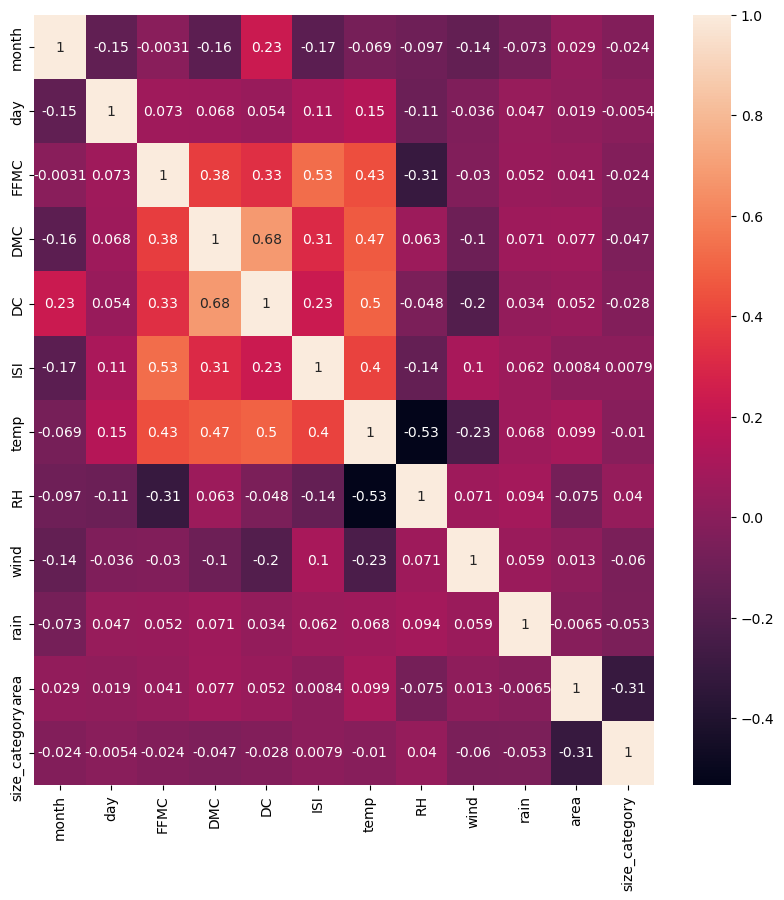

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(fire.corr(),annot=True)

In [89]:
fire[fire.duplicated()]


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category


In [90]:
fire.drop_duplicates(inplace=True)
fire.reset_index(drop=True,inplace=True)

In [91]:
fire[fire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'month'),
  Text(1, 0, 'day'),
  Text(2, 0, 'FFMC'),
  Text(3, 0, 'DMC'),
  Text(4, 0, 'DC'),
  Text(5, 0, 'ISI'),
  Text(6, 0, 'temp'),
  Text(7, 0, 'RH'),
  Text(8, 0, 'wind'),
  Text(9, 0, 'rain'),
  Text(10, 0, 'area'),
  Text(11, 0, 'size_category')])

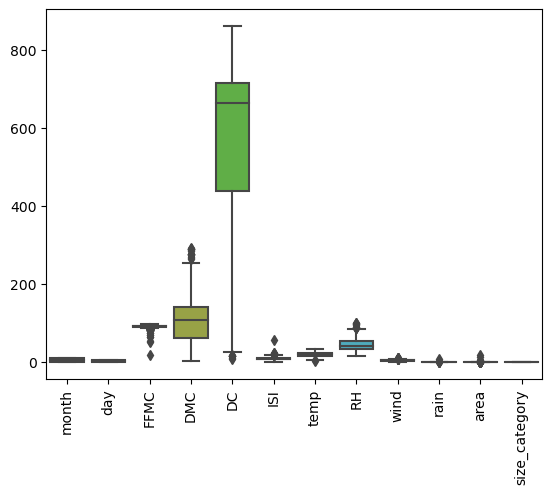

In [92]:
sns.boxplot(data=fire)
plt.xticks(rotation=90)

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
sd_scaler=StandardScaler()


In [95]:
fire['area']=sd_scaler.fit_transform(fire['area'].values.reshape(-1,1))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'month'),
  Text(1, 0, 'day'),
  Text(2, 0, 'FFMC'),
  Text(3, 0, 'DMC'),
  Text(4, 0, 'DC'),
  Text(5, 0, 'ISI'),
  Text(6, 0, 'temp'),
  Text(7, 0, 'RH'),
  Text(8, 0, 'wind'),
  Text(9, 0, 'rain'),
  Text(10, 0, 'area'),
  Text(11, 0, 'size_category')])

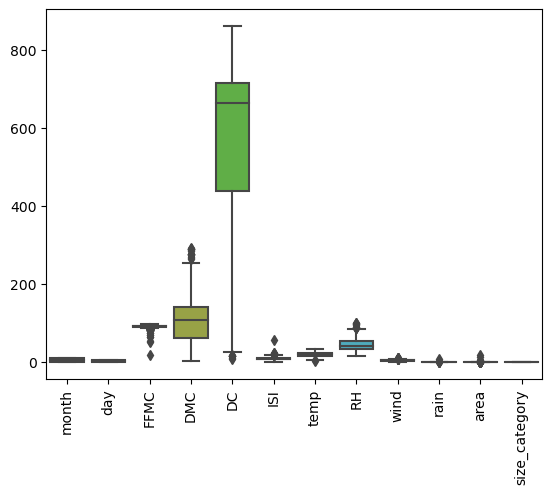

In [96]:
sns.boxplot(data=fire)
plt.xticks(rotation=90)

In [124]:
X=fire.iloc[:,:11]
y=fire.iloc[:,11]

In [125]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,-0.202791
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,-0.202791
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,-0.202791
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,-0.202791
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,-0.202791
...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,-0.102277
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0.644559
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,-0.028608
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,-0.202791


In [126]:
y

0      1
1      1
2      1
3      1
4      1
      ..
504    0
505    0
506    0
507    1
508    1
Name: size_category, Length: 509, dtype: int8

In [127]:
from imblearn.over_sampling import SMOTE

In [128]:
smote=SMOTE(sampling_strategy='auto')

In [129]:
X,y=smote.fit_resample(X,y)

In [130]:
#split the data into train and test

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((593, 11), (149, 11), (593,), (149,))

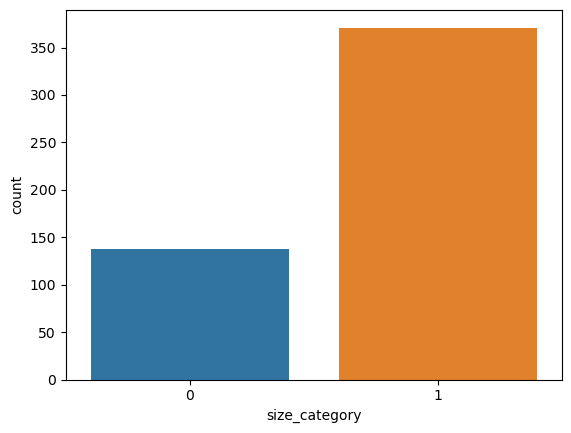

1    371
0    138
Name: size_category, dtype: int64

In [133]:
sns.countplot(x='size_category',data=fire)
plt.xlabel('size_category')
plt.ylabel('count')
plt.show()
fire['size_category'].value_counts()

<Axes: xlabel='month'>

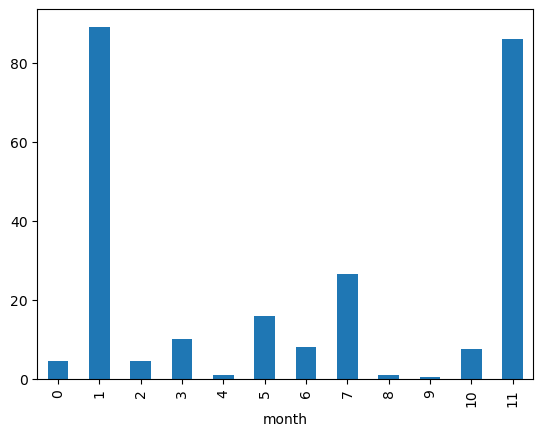

In [134]:
pd.crosstab(fire['size_category'],fire['month']).mean().plot(kind='bar')

<Axes: xlabel='month'>

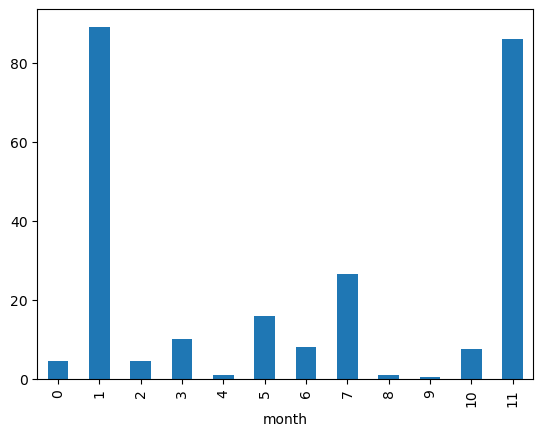

In [135]:
pd.crosstab(fire['size_category'],fire['month']).mean().plot(kind='bar')

<Axes: xlabel='day'>

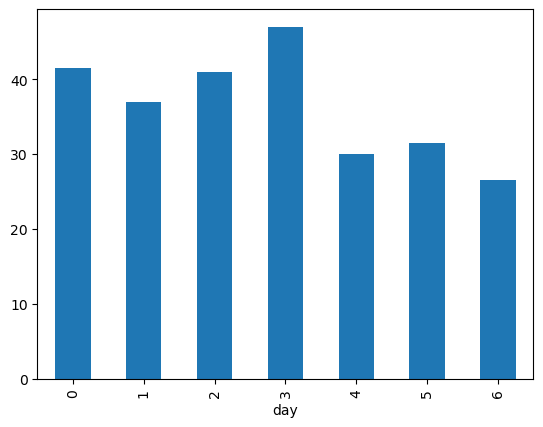

In [136]:
pd.crosstab(fire['size_category'],fire['day']).mean().plot(kind='bar')

<Axes: xlabel='FFMC'>

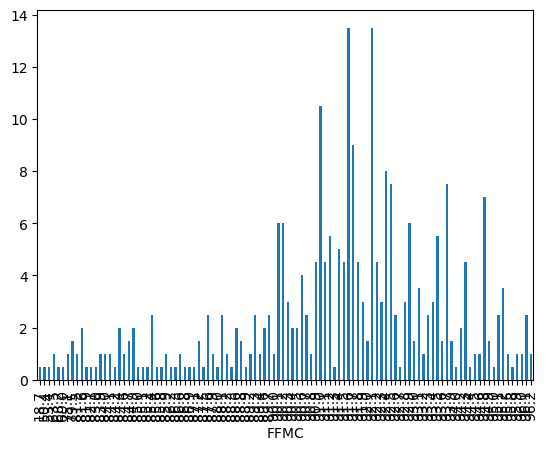

In [137]:
pd.crosstab(fire['size_category'],fire['FFMC']).mean().plot(kind='bar')

<Axes: xlabel='DMC'>

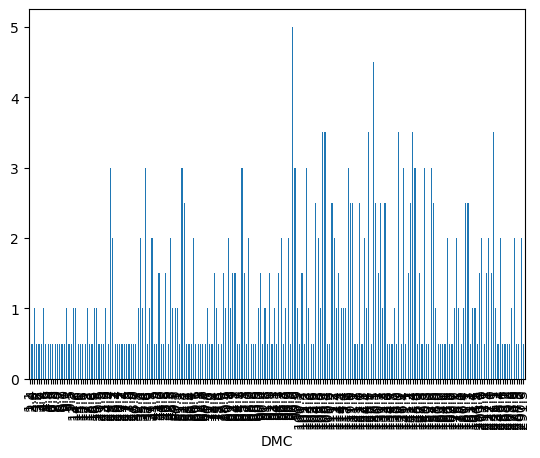

In [138]:
pd.crosstab(fire['size_category'],fire['DMC']).mean().plot(kind='bar')

<Axes: xlabel='wind'>

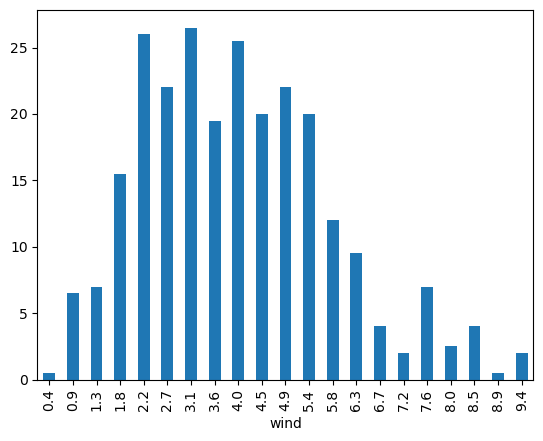

In [139]:
pd.crosstab(fire['size_category'],fire['wind']).mean().plot(kind='bar')

<Axes: xlabel='temp'>

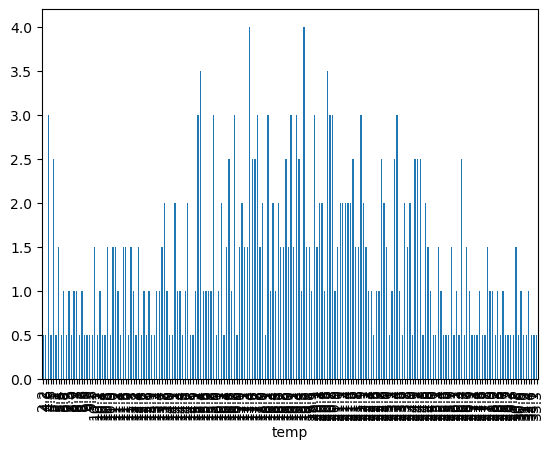

In [140]:
pd.crosstab(fire['size_category'],fire['temp']).mean().plot(kind='bar')

<Axes: xlabel='RH'>

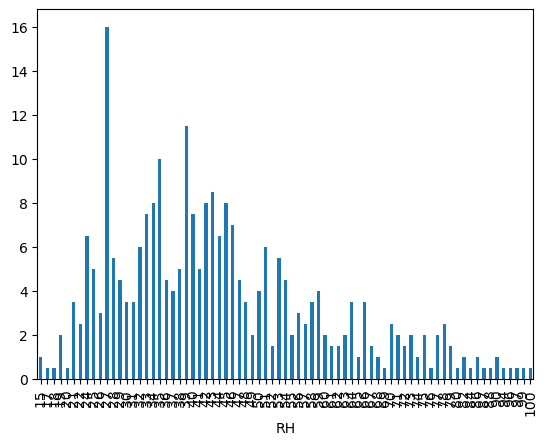

In [141]:
pd.crosstab(fire['size_category'],fire['RH']).mean().plot(kind='bar')

In [142]:
#biuld the model

In [143]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [144]:
model=SVC(C=0.5,gamma=0.01,kernel='rbf')

In [145]:
model.fit(X,y)

SVC(C=0.5, gamma=0.01)

In [146]:
#training data

In [147]:
train_pred=model.predict(X_train)
train_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [148]:
cm=confusion_matrix(y_train,train_pred)
cm

array([[267,  30],
       [ 37, 259]], dtype=int64)

<Axes: >

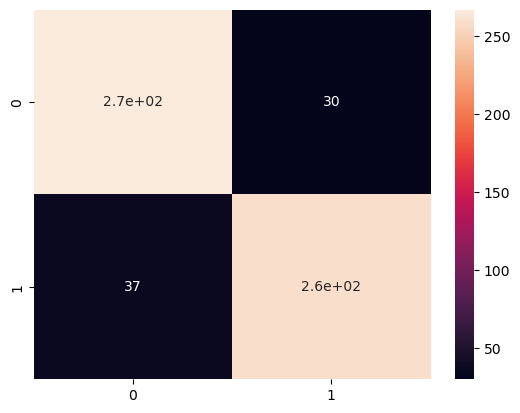

In [149]:
sns.heatmap(cm,annot=True)

In [150]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       297
           1       0.90      0.88      0.89       296

    accuracy                           0.89       593
   macro avg       0.89      0.89      0.89       593
weighted avg       0.89      0.89      0.89       593



In [151]:
# roc auc curve for testing data

In [152]:
#the output probabilities
model = SVC(probability=True)
model.fit(X_train, y_train)
train_proba = model.predict_proba(X_train)

In [153]:
train_proba[:,1]

array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.50575569,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5    

In [154]:
#false positive rate,true possitive rate,threshold 
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])

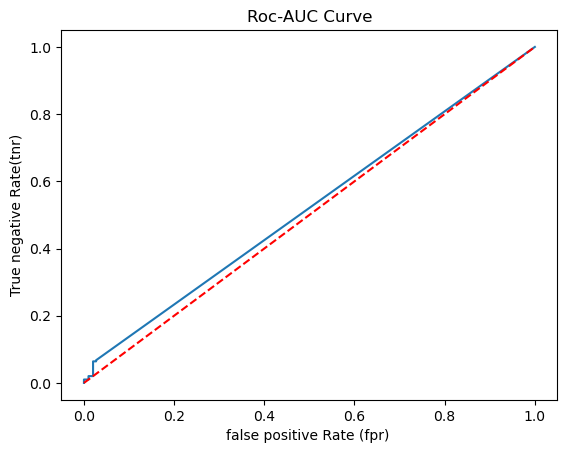

In [155]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('Roc-AUC Curve')
plt.xlabel('false positive Rate (fpr) ')
plt.ylabel('True negative Rate(tnr)')
plt.show()

In [156]:
#testing data

In [157]:
test_pred=model.predict(X_test)
test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int8)

In [158]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[70,  4],
       [65, 10]], dtype=int64)

<Axes: >

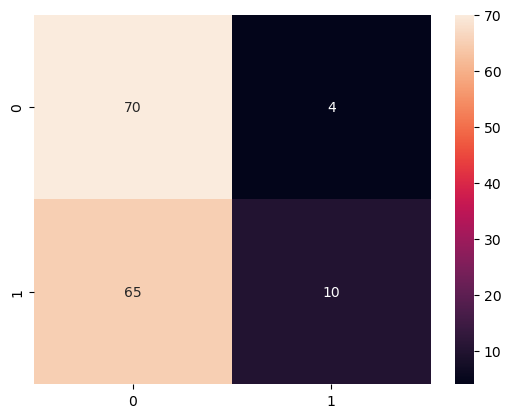

In [159]:
sns.heatmap(cm,annot=True)

In [160]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.52      0.95      0.67        74
           1       0.71      0.13      0.22        75

    accuracy                           0.54       149
   macro avg       0.62      0.54      0.45       149
weighted avg       0.62      0.54      0.45       149



In [161]:
# roc auc curve for testing data

In [162]:
#the output probabilities
model = SVC(probability=True)
model.fit(X_train, y_train)
test_proba = model.predict_proba(X_test)

In [163]:
test_proba[:,1]

array([0.48550067, 0.48860637, 0.49387629, 0.48446514, 0.49280095,
       0.48279115, 0.54563635, 0.47787225, 0.47671343, 0.47914238,
       0.47731229, 0.49411732, 0.48282361, 0.47514291, 0.47738244,
       0.49412977, 0.48584488, 0.48553462, 0.48321497, 0.55311599,
       0.48125284, 0.49276687, 0.4779906 , 0.48071436, 0.48551387,
       0.48003553, 0.54832746, 0.48145231, 0.48192593, 0.48268592,
       0.48107179, 0.48461529, 0.5       , 0.47697413, 0.47429141,
       0.48354585, 0.47887342, 0.49386934, 0.47727622, 0.49266952,
       0.48636747, 0.49265747, 0.47923678, 0.49126319, 0.5       ,
       0.49114019, 0.48790955, 0.49145867, 0.5       , 0.48423981,
       0.48459581, 0.4927966 , 0.47795484, 0.48658383, 0.49210491,
       0.48365903, 0.48225575, 0.47566539, 0.48237912, 0.47565743,
       0.49290912, 0.48060624, 0.48605274, 0.4767484 , 0.48293004,
       0.4772152 , 0.47765907, 0.47887509, 0.48029377, 0.48842654,
       0.48516841, 0.49205884, 0.4798039 , 0.49014632, 0.49174

In [164]:
#false positive rate,true possitive rate,threshold 
fpr,tpr,thresh=roc_curve(y_test,test_proba[:,1])

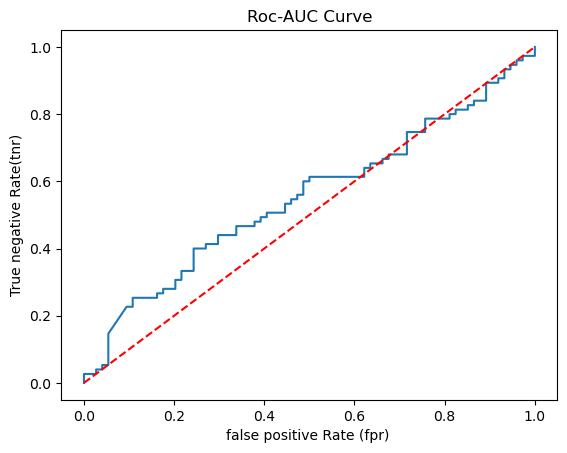

In [165]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('Roc-AUC Curve')
plt.xlabel('false positive Rate (fpr) ')
plt.ylabel('True negative Rate(tnr)')
plt.show()

In [166]:
#visualize the training data

In [167]:
from sklearn.manifold import TSNE

In [168]:
vmodel=TSNE(n_components=2)

In [169]:
tsne_comps=vmodel.fit_transform(X_train)

In [170]:
tsne_comps

array([[ -1.3131522,  16.38491  ],
       [ 15.038582 ,  16.471933 ],
       [ -6.8302097, -28.336075 ],
       ...,
       [ 22.038311 ,  19.067049 ],
       [-21.394041 ,  25.115807 ],
       [ 28.37247  , -12.023627 ]], dtype=float32)

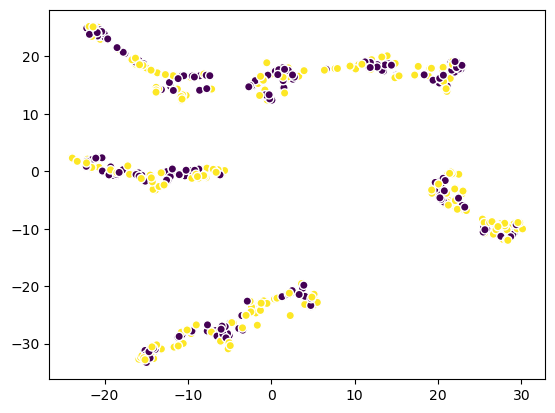

In [171]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y_train,cmap='viridis',edgecolors='white')

In [172]:
#visualize the testing data

In [173]:
tsne_comps=vmodel.fit_transform(X_test)

In [174]:
tsne_comps

array([[-3.66506837e-02, -8.52173686e-01],
       [ 2.33883888e-01, -1.81658351e+00],
       [-6.15615940e+00, -4.10184813e+00],
       [-1.13870704e+00, -2.26753426e+00],
       [ 1.01292124e+01,  5.87817001e+00],
       [-1.55529988e+00, -1.61419117e+00],
       [ 1.14093037e+01,  6.93205976e+00],
       [ 8.19840550e-01, -7.69838667e+00],
       [ 6.29597235e+00,  1.68256235e+00],
       [ 4.90136671e+00, -5.70954047e-02],
       [ 4.21241522e+00, -1.17140830e+00],
       [-5.99481630e+00, -1.70797360e+00],
       [-1.53858125e+00, -1.56434536e+00],
       [ 7.76540220e-01, -7.72747087e+00],
       [ 8.93173027e+00,  4.66935873e+00],
       [-5.99759960e+00, -4.41220856e+00],
       [ 1.13982892e+00,  9.52768743e-01],
       [ 8.89641523e-01,  7.14403689e-01],
       [-3.33436191e-01, -2.74540693e-01],
       [ 1.17730350e+01,  7.44453716e+00],
       [ 9.77315807e+00,  5.33919859e+00],
       [-6.27554035e+00, -5.58853674e+00],
       [ 6.50895834e+00,  2.66167474e+00],
       [ 8.

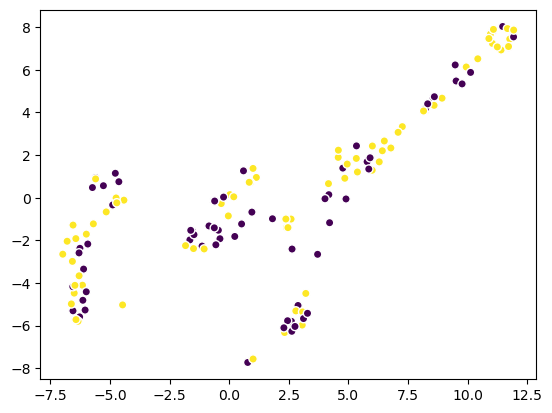

In [175]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y_test,cmap='viridis',edgecolors='white')